# Decision Tree

In decision trees, data is broke down by making decisions based on asking a series of questions. A great advantage is the interpretability.

In [98]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree as showtree

Import data.

In [89]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

Split data.

In [90]:
X_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]
X_test, y_test = test.iloc[:, :-1], test.iloc[:, -1]

Perform hyperparameter tuning with gridsearch. Several cross validation sizes were checked out, higher numbers increased performance as often the smaller ones hardly had any of the less occuring drugs in them.

In [91]:
tree = DecisionTreeClassifier(random_state = 10)
param_grid = {
    "max_depth": list(range(1, 20))
}

grid_search = GridSearchCV(tree, param_grid, cv=40, scoring='accuracy')
grid_search.fit(X_train, y_train)

/Users/Alexander/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 13 members, which is less than n_splits=40.
  warnings.warn(


GridSearchCV(cv=40, estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [92]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 6}
Best score:  0.74375


In [93]:
r = grid_search.cv_results_
print(r["params"])
print(r["mean_test_score"])

[{'max_depth': 1}, {'max_depth': 2}, {'max_depth': 3}, {'max_depth': 4}, {'max_depth': 5}, {'max_depth': 6}, {'max_depth': 7}, {'max_depth': 8}, {'max_depth': 9}, {'max_depth': 10}, {'max_depth': 11}, {'max_depth': 12}, {'max_depth': 13}, {'max_depth': 14}, {'max_depth': 15}, {'max_depth': 16}, {'max_depth': 17}, {'max_depth': 18}, {'max_depth': 19}]
[0.71875 0.71875 0.6125  0.68125 0.7     0.74375 0.65625 0.70625 0.7125
 0.7125  0.6875  0.6875  0.6875  0.6875  0.6875  0.6875  0.6875  0.6875
 0.6875 ]


Next the tree is trained with the best hyperparameter.

In [94]:
tree = DecisionTreeClassifier(max_depth = 6,
                              random_state = 10)

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=10)

In [95]:
predictions = tree.predict(X_test)

The decision tree manages to achieve a perfect classification for drug Y. All predicted drug Ys were correctly classified and all true drug Ys were found. However this is not the case with the other labels. Drug C is not classified at all.

In [96]:
c = classification_report(y_test, predictions)
print(c)

              precision    recall  f1-score   support

           A       0.43      0.60      0.50         5
           B       0.50      0.33      0.40         3
           C       0.00      0.00      0.00         3
           X       0.58      0.64      0.61        11
           Y       1.00      1.00      1.00        18

    accuracy                           0.73        40
   macro avg       0.50      0.51      0.50        40
weighted avg       0.70      0.72      0.71        40



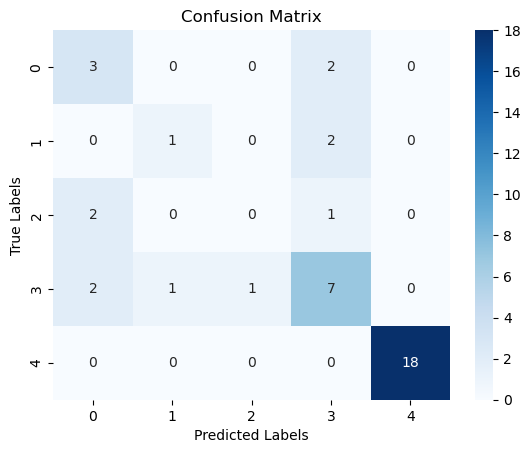

In [97]:
cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

A great advantage of the decision tree is its interpretability. In the following plot we can see that the first split occurs with the feature Na_to_K. All patients with a ratio higher than 14.829 are automatically assigned to drug Y. As seen in the naive model these are in fact all patients who take drug Y. The next split occurs by age. This is particularly helpful for seperating drugs A and B.

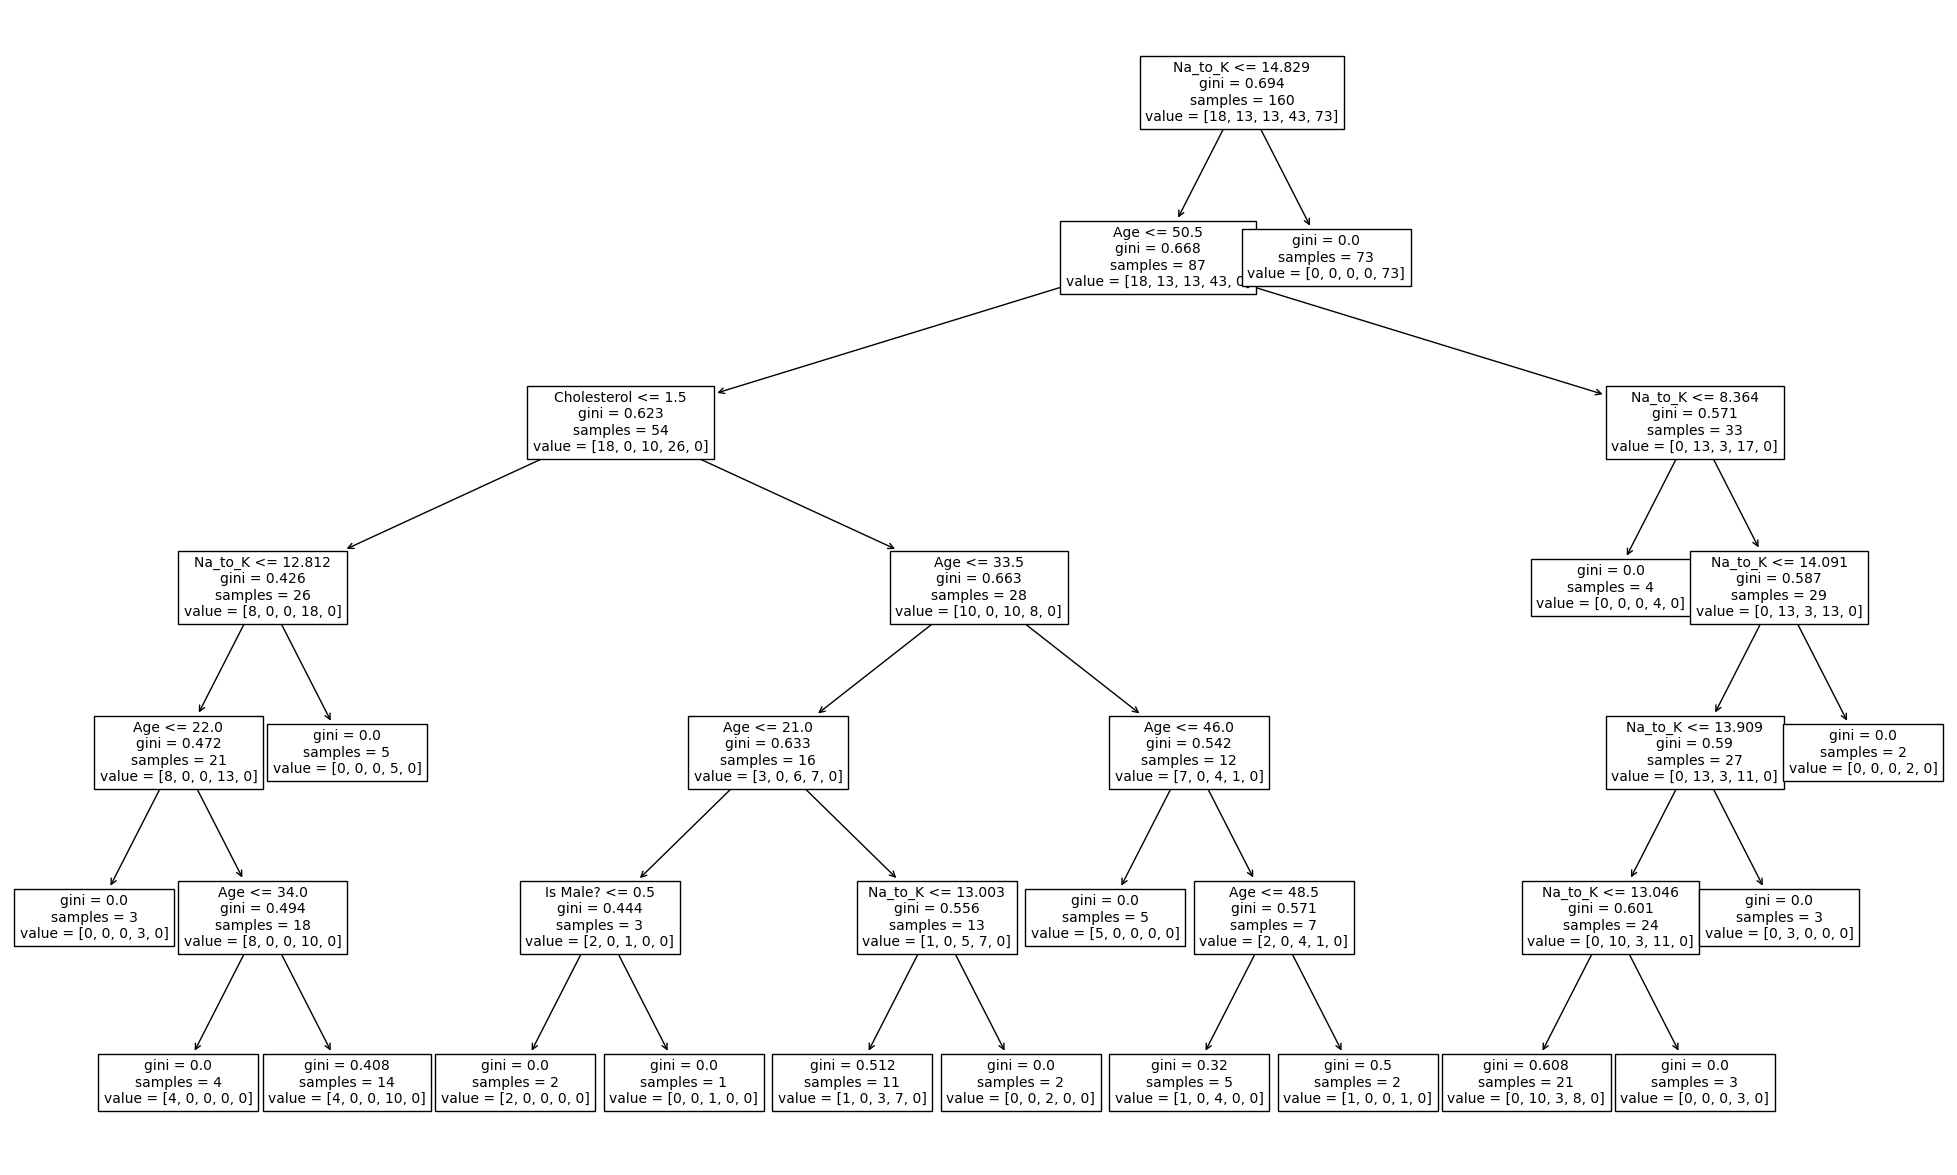

In [107]:
features = ["Age", "Is Male?", "Cholesterol", "Na_to_K"]
plt.figure(figsize=(25,15))
showtree.plot_tree(tree,
                   feature_names=features,
                   fontsize=10)
plt.show()